In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/meat_production_by_type.csv')

In [3]:
df

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes"
0,Afghanistan,AFG,1961,4000.00,NaN,3600.00,73220.00,43000.00,NaN,5600.00
1,Afghanistan,AFG,1962,4000.00,NaN,4030.74,72375.00,45800.00,NaN,6000.00
2,Afghanistan,AFG,1963,5000.00,NaN,5031.36,75530.00,47250.00,NaN,6160.00
3,Afghanistan,AFG,1964,5000.00,NaN,4680.00,79750.00,48000.00,NaN,6400.00
4,Afghanistan,AFG,1965,6000.00,NaN,4320.00,84375.00,48700.00,NaN,6800.00
...,...,...,...,...,...,...,...,...,...,...
14085,Zimbabwe,ZWE,2017,35804.70,NaN,NaN,26537.31,609788.00,11479.25,92300.32
14086,Zimbabwe,ZWE,2018,35721.81,NaN,NaN,28097.57,616480.00,9555.82,103480.91
14087,Zimbabwe,ZWE,2019,35686.72,NaN,NaN,32425.14,629189.00,10648.16,114520.91
14088,Zimbabwe,ZWE,2020,35755.19,NaN,NaN,27629.93,628746.00,10104.50,111723.05


In [4]:
# Lista de entidades que son continentes, regiones o categorías de ingresos y que deben ser eliminadas
non_country_entities = [
    "Africa", "Africa (FAO)", "Americas (FAO)", "Asia", "Asia (FAO)", "Europe",
    "Europe (FAO)", "Oceania", "Oceania (FAO)", "World", "European Union (27)",
    "European Union (27) (FAO)", "Belgium-Luxembourg (FAO)", "High-income countries",
    "Land Locked Developing Countries (FAO)", "Least Developed Countries (FAO)",
    "Low Income Food Deficit Countries (FAO)", "Low-income countries",
    "Lower-middle-income countries", "Net Food Importing Developing Countries (FAO)",
    "Small Island Developing States (FAO)", "Upper-middle-income countries",
    "Eastern Africa (FAO)", "Eastern Asia (FAO)", "Eastern Europe (FAO)",
    "Middle Africa (FAO)", "Northern Africa (FAO)", "Northern America (FAO)",
    "Northern Europe (FAO)", "South America", "South America (FAO)", "South-eastern Asia (FAO)",
    "Southern Africa (FAO)", "Southern Asia (FAO)", "Southern Europe (FAO)",
    "Western Africa (FAO)", "Western Asia (FAO)", "Western Europe (FAO)",
    "Caribbean (FAO)", "Central America (FAO)", "Central Asia (FAO)", "Melanesia",
    "Micronesia (FAO)", "Polynesia"
]

# Filtrando el conjunto de datos para eliminar estas entidades
df_no_continents = df[~df['Entity'].isin(non_country_entities)]

# Mostrando las primeras filas del conjunto de datos limpio
df_no_continents.head()


,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes"
0,Afghanistan,AFG,1961,4000.0,NaN,3600.00,73220.0,43000.0,NaN,5600.0
1,Afghanistan,AFG,1962,4000.0,NaN,4030.74,72375.0,45800.0,NaN,6000.0
2,Afghanistan,AFG,1963,5000.0,NaN,5031.36,75530.0,47250.0,NaN,6160.0
3,Afghanistan,AFG,1964,5000.0,NaN,4680.00,79750.0,48000.0,NaN,6400.0
4,Afghanistan,AFG,1965,6000.0,NaN,4320.00,84375.0,48700.0,NaN,6800.0


In [5]:
# Renombrando las columnas
columns_renamed = {
    'Entity': 'Country',
    'Meat, game | 00001163 || Production | 005510 || tonnes': 'Game Meat Production (tonnes)',
    'Meat, horse | 00001097 || Production | 005510 || tonnes': 'Horse Meat Production (tonnes)',
    'Meat, camel | 00001127 || Production | 005510 || tonnes': 'Camel Meat Production (tonnes)',
    'Meat, sheep and goat | 00001807 || Production | 005510 || tonnes': 'Sheep and Goat Meat Production (tonnes)',
    'Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes': 'Beef and Buffalo Meat Production (tonnes)',
    'Meat, pig | 00001035 || Production | 005510 || tonnes': 'Pigmeat Production (tonnes)',
    'Meat, poultry | 00001808 || Production | 005510 || tonnes': 'Poultry Meat Production (tonnes)'
}

df_selected_countries = df_no_continents.rename(columns=columns_renamed)

# Eliminando la columna 'Code'
df_selected_countries = df_selected_countries.drop(columns=['Code'])

# Mostrando las primeras filas del conjunto de datos actualizado
df_selected_countries.head()

,Country,Year,Game Meat Production (tonnes),Horse Meat Production (tonnes),Camel Meat Production (tonnes),Sheep and Goat Meat Production (tonnes),Beef and Buffalo Meat Production (tonnes),Pigmeat Production (tonnes),Poultry Meat Production (tonnes)
0,Afghanistan,1961,4000.0,NaN,3600.00,73220.0,43000.0,NaN,5600.0
1,Afghanistan,1962,4000.0,NaN,4030.74,72375.0,45800.0,NaN,6000.0
2,Afghanistan,1963,5000.0,NaN,5031.36,75530.0,47250.0,NaN,6160.0
3,Afghanistan,1964,5000.0,NaN,4680.00,79750.0,48000.0,NaN,6400.0
4,Afghanistan,1965,6000.0,NaN,4320.00,84375.0,48700.0,NaN,6800.0


In [6]:
df_selected_countries['Total Meat Production (tonnes)'] = df_selected_countries[
    ['Game Meat Production (tonnes)',
     'Horse Meat Production (tonnes)',
     'Camel Meat Production (tonnes)',
     'Sheep and Goat Meat Production (tonnes)',
     'Beef and Buffalo Meat Production (tonnes)',
     'Pigmeat Production (tonnes)',
     'Poultry Meat Production (tonnes)']
].sum(axis=1)

# Mostrando las primeras filas con la nueva columna de total añadida
df_selected_countries.head()

,Country,Year,Game Meat Production (tonnes),Horse Meat Production (tonnes),Camel Meat Production (tonnes),Sheep and Goat Meat Production (tonnes),Beef and Buffalo Meat Production (tonnes),Pigmeat Production (tonnes),Poultry Meat Production (tonnes),Total Meat Production (tonnes)
0,Afghanistan,1961,4000.0,NaN,3600.00,73220.0,43000.0,NaN,5600.0,129420.00
1,Afghanistan,1962,4000.0,NaN,4030.74,72375.0,45800.0,NaN,6000.0,132205.74
2,Afghanistan,1963,5000.0,NaN,5031.36,75530.0,47250.0,NaN,6160.0,138971.36
3,Afghanistan,1964,5000.0,NaN,4680.00,79750.0,48000.0,NaN,6400.0,143830.00
4,Afghanistan,1965,6000.0,NaN,4320.00,84375.0,48700.0,NaN,6800.0,150195.00


C:\Users\Alberte\.conda\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Alberte\.conda\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Alberte\.conda\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Alberte\.conda\envs\EDA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

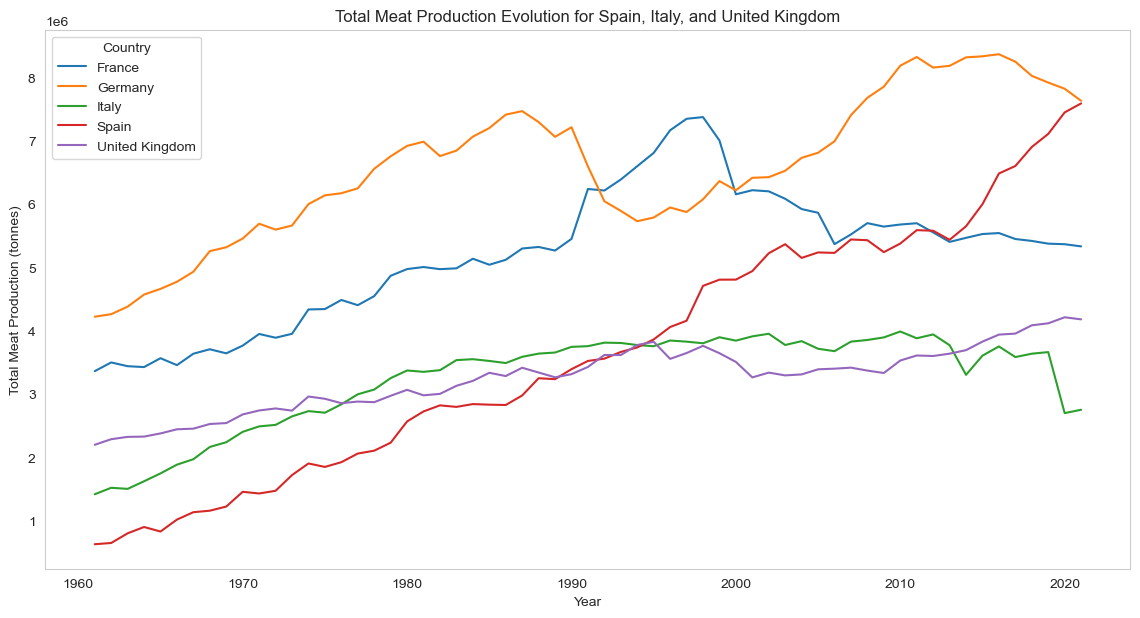

In [10]:
# Crearemos un DataFrame de Seaborn específico para España, Italia y el Reino Unido
df_seaborn_plot = df_selected_countries[
    df_selected_countries['Country'].isin(['Spain', 'Italy', 'United Kingdom', 'Germany', 'France'])]

# Ahora generamos el gráfico de líneas con Seaborn solo para estos tres países
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Total Meat Production (tonnes)', hue='Country', data=df_seaborn_plot, palette="tab10")

plt.title('Total Meat Production Evolution for Spain, Italy, and United Kingdom')
plt.xlabel('Year')
plt.ylabel('Total Meat Production (tonnes)')
plt.legend(title='Country')
plt.grid(False)
plt.show()
